# comparative analysis of the `IsolationForest` and `LocalOutlierFactor (LOF)` approaches for anomaly detection #

---

### 1. **Algorithm Characteristics**

| Aspect                | **Isolation Forest**                                         | **Local Outlier Factor (LOF)**                                       |
|-----------------------|--------------------------------------------------------------|----------------------------------------------------------------------|
| **Purpose**           | Detects outliers by isolating samples in a random forest.    | Detects outliers by comparing local density of each point to its neighbors. |
| **Contamination**     | Requires setting contamination level.                        | Also requires contamination but heavily influenced by `n_neighbors`. |
| **Output Labels**     | `1` for normal, `-1` for anomaly (mapped to `0` and `1`).    | Same output labels as Isolation Forest but based on local density.  |
| **Hyperparameters**   | Key parameter: `contamination`.                              | Key parameters: `n_neighbors` and `contamination`.                  |
| **Sensitivity**       | Less sensitive to small parameter changes; ideal for larger, high-dimensional datasets. | Sensitive to `n_neighbors`; optimal in smaller or lower-dimensional datasets. |

---

### 2. **Hyperparameter Tuning**

| Aspect                     | **Isolation Forest**                               | **Local Outlier Factor (LOF)**                            |
|----------------------------|---------------------------------------------------|-----------------------------------------------------------|
| **Key Parameter**          | `contamination` controls the proportion of outliers expected in the data. | `n_neighbors` determines the number of neighbors considered when detecting outliers. |
| **Parameter Tuning Process** | Simple as only contamination needs adjusting; tuning is often easier. | `n_neighbors` requires careful tuning due to its influence on the model’s sensitivity to density changes. |

- **Isolation Forest**: `contamination` is set once. Since Isolation Forest partitions data in a tree structure, adjusting this parameter typically provides good results without needing additional tuning.
- **Local Outlier Factor (LOF)**: Requires a range of `n_neighbors` values. The model’s sensitivity and results vary significantly with different values, so evaluating several values is necessary for optimal performance.

---

### 3. **Performance Evaluation and Metrics**

| Metric                  | **Isolation Forest**                             | **Local Outlier Factor (LOF)**                    |
|-------------------------|-------------------------------------------------|--------------------------------------------------|
| **Accuracy**            | Directly calculated based on contamination parameter; less fluctuation with parameter changes. | Varies based on `n_neighbors`; selecting a higher number of neighbors might increase stability in accuracy. |
| **Precision, Recall, F1 Score** | Stable across runs; tuned based on contamination level to achieve target precision and recall. | Results can fluctuate depending on `n_neighbors`; fine-tuning `n_neighbors` can help maximize F1 score, especially for imbalanced data. |

---

### 4. **Visualizations**

| Visualization Type                       | **Isolation Forest**                                           | **Local Outlier Factor (LOF)**                           |
|------------------------------------------|----------------------------------------------------------------|-----------------------------------------------------------|
| **Confusion Matrix**                     | Displays true positives, false positives, true negatives, and false negatives. | Same as Isolation Forest, but might differ across `n_neighbors` values. |
| **Scatter Plot (Feature Space)**         | Shows clusters of anomalies; suitable for higher-dimensional data due to random forest-based separation. | Shows clusters of anomalies, but sensitive to density changes in data. |
| **Distribution Visualization**           | Highlights distinct anomaly distributions for each feature.   | Same as Isolation Forest; visualizations can differ based on `n_neighbors`. |
| **Performance Metrics Plot**             | Typically requires fewer plot lines due to minimal tuning parameters. | Plots for accuracy, precision, recall, and F1 score across different `n_neighbors` values, which provide insights into optimal neighbors. |

---

### 5. **Use Case Suitability**

| Use Case Aspect                | **Isolation Forest**                                   | **Local Outlier Factor (LOF)**                              |
|--------------------------------|--------------------------------------------------------|-------------------------------------------------------------|
| **Best for High-Dimensional Data**  | Yes, performs well as it uses random forest structure. | Less ideal; density-based approach performs better in lower dimensions. |
| **Sensitivity to Local Outliers**   | Less sensitive; tends to generalize outlier detection. | Highly sensitive to local density changes, ideal for data with local clusters. |
| **Scalability**                    | Highly scalable due to tree-based approach.            | Less scalable as `n_neighbors` increases due to computational demand. |
| **Robustness with Few Parameters**  | More robust; fewer parameters to tune.                 | Requires more tuning, especially `n_neighbors`, for reliable results. |

---

### 6. **Advantages and Disadvantages Summary**

| Aspect               | **Isolation Forest**                            | **Local Outlier Factor (LOF)**                             |
|----------------------|------------------------------------------------|------------------------------------------------------------|
| **Advantages**       | Robust with minimal tuning; scalable and effective in high dimensions. | Sensitive to local density variations; detects subtle local anomalies. |
| **Disadvantages**    | Less sensitive to local density, might miss some types of anomalies. | Sensitive to parameter tuning and can be computationally expensive with large `n_neighbors`. |

---

### Conclusion 

- **Isolation Forest**: Suitable for large datasets with potentially high dimensions, providing stable and scalable anomaly detection with minimal parameter tuning. Recommended for general anomaly detection, especially when a simple contamination adjustment can produce good results.

- **Local Outlier Factor (LOF)**: Ideal for data with local density variations or when anomalies exist in specific clusters. However, this approach requires more parameter tuning, specifically for `n_neighbors`, to achieve optimal performance and accuracy. It is best suited for small to medium-sized datasets with local clusters.

Anomaly Detection Model Comparison Report: Isolation Forest vs. Local Outlier Factor

1. Performance Summary Table



,Model,Accuracy,F1 Score,Precision,Recall,ROC-AUC
0,Isolation Forest,0.4925,0.2610,0.9229,0.1520,0.5669
1,Local Outlier Factor,0.4698,0.2313,0.7967,0.1353,0.5429



2. Analysis of Model Performance

Isolation Forest:
- Precision (92.29%): High precision, meaning that when it detects an anomaly, it's often correct.
  This could be valuable in cases where false positives are more acceptable than false negatives.
- Recall (15.20%): Low recall indicates that it misses a significant portion of actual anomalies,
  making it less effective for capturing all anomalies in the dataset.
- F1 Score (26.10%): Low F1 score, reflecting an imbalanced detection performance.
- ROC-AUC (56.69%): Modest discriminative power, slightly above random guessing.

Local Outlier Factor (LOF):
- Precision (79.67%): Decent precision, though lower than Isolation Forest. LOF is conservative, resulting
  in fewer but more accurate detections.
- Recall (13.53%): Like Isolation Forest, LOF’s low recall indicates it struggles to capture a comprehensive set of anomalies.
- F1 Score (23.13%): Low F1 score, indicating a trade-off between high precision and low recall.
- ROC-AUC (54.29

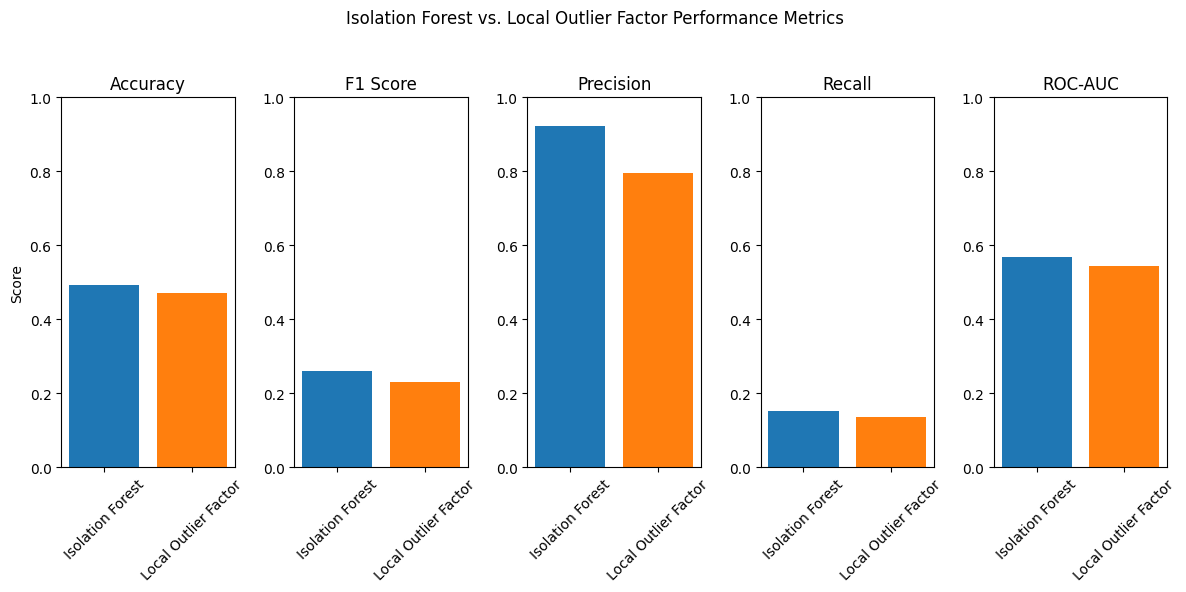

In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Define the performance summary data
performance_data = {
    'Model': ['Isolation Forest', 'Local Outlier Factor'],
    'Accuracy': [0.4925, 0.4698],
    'F1 Score': [0.2610, 0.2313],
    'Precision': [0.9229, 0.7967],
    'Recall': [0.1520, 0.1353],
    'ROC-AUC': [0.5669, 0.5429]
}

# Create a DataFrame for easy analysis and display
performance_df = pd.DataFrame(performance_data)

# Display the Performance Summary Table
print("Anomaly Detection Model Comparison Report: Isolation Forest vs. Local Outlier Factor\n")
print("1. Performance Summary Table\n")
display(performance_df)

# Analysis Section
print("\n2. Analysis of Model Performance")

# Analysis of Isolation Forest
print("\nIsolation Forest:")
print(f"- Precision (92.29%): High precision, meaning that when it detects an anomaly, it's often correct.")
print("  This could be valuable in cases where false positives are more acceptable than false negatives.")
print(f"- Recall (15.20%): Low recall indicates that it misses a significant portion of actual anomalies,")
print("  making it less effective for capturing all anomalies in the dataset.")
print(f"- F1 Score (26.10%): Low F1 score, reflecting an imbalanced detection performance.")
print(f"- ROC-AUC (56.69%): Modest discriminative power, slightly above random guessing.\n")

# Analysis of Local Outlier Factor (LOF)
print("Local Outlier Factor (LOF):")
print(f"- Precision (79.67%): Decent precision, though lower than Isolation Forest. LOF is conservative, resulting")
print("  in fewer but more accurate detections.")
print(f"- Recall (13.53%): Like Isolation Forest, LOF’s low recall indicates it struggles to capture a comprehensive set of anomalies.")
print(f"- F1 Score (23.13%): Low F1 score, indicating a trade-off between high precision and low recall.")
print(f"- ROC-AUC (54.29%): Similar to Isolation Forest, showing limited capacity to distinguish between normal and anomalous points.\n")

# Plot the performance metrics
metrics = ['Accuracy', 'F1 Score', 'Precision', 'Recall', 'ROC-AUC']
colors = ['#1f77b4', '#ff7f0e']

plt.figure(figsize=(12, 6))

# Bar plot for each metric
for idx, metric in enumerate(metrics):
    plt.subplot(1, 5, idx + 1)
    plt.bar(performance_df['Model'], performance_df[metric], color=colors)
    plt.title(metric)
    plt.ylim(0, 1)
    plt.ylabel('Score' if idx == 0 else '')
    plt.xticks(rotation=45)

plt.suptitle('Isolation Forest vs. Local Outlier Factor Performance Metrics')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
